<a href="https://colab.research.google.com/github/Louis5228/DOPE-Colab/blob/main/DOPE_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install ROS
We will use ROS melodic

In [1]:
!sh -c 'echo "deb http://packages.ros.org/ros/ubuntu $(lsb_release -sc) main" > /etc/apt/sources.list.d/ros-latest.list'
!apt-key adv --keyserver 'hkp://keyserver.ubuntu.com:80' --recv-key C1CF6E31E6BADE8868B172B4F42ED6FBAB17C654
!sudo apt update && apt install ros-melodic-ros-base

Executing: /tmp/apt-key-gpghome.IKCXHwQlr0/gpg.1.sh --keyserver hkp://keyserver.ubuntu.com:80 --recv-key C1CF6E31E6BADE8868B172B4F42ED6FBAB17C654
gpg: key F42ED6FBAB17C654: public key "Open Robotics <info@osrfoundation.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://packages.ros.org/ros/ubuntu bionic InRelease [4,680 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/co

## Create a catkin workspace

In [2]:
!mkdir -p /content/catkin_ws/src # Replace `catkin_ws` with the name of your workspace
%cd /content/catkin_ws/
!source /opt/ros/melodic/setup.bash && catkin_make

/content/catkin_ws
Base path: /content/catkin_ws
Source space: /content/catkin_ws/src
Build space: /content/catkin_ws/build
Devel space: /content/catkin_ws/devel
Install space: /content/catkin_ws/install
Creating symlink "/content/catkin_ws/src/CMakeLists.txt" pointing to "/opt/ros/melodic/share/catkin/cmake/toplevel.cmake"
####
#### Running command: "cmake /content/catkin_ws/src -DCATKIN_DEVEL_PREFIX=/content/catkin_ws/devel -DCMAKE_INSTALL_PREFIX=/content/catkin_ws/install -G Unix Makefiles" in "/content/catkin_ws/build"
####
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compile

## Download the DOPE code

In [3]:
%cd /content/catkin_ws/src
!git clone https://github.com/NVlabs/Deep_Object_Pose.git dope

/content/catkin_ws/src
Cloning into 'dope'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 447 (delta 1), reused 0 (delta 0), pack-reused 440
Receiving objects: 100% (447/447), 363.60 KiB | 7.42 MiB/s, done.
Resolving deltas: 100% (226/226), done.


## Install python dependencies
Install python dependencies with requirements.txt and install pyrr with python2

In [4]:
%cd /content/catkin_ws/src/dope
print("\nVersion of python dependencies:")
!cat requirements.txt

/content/catkin_ws/src/dope

Version of python dependencies:
pyrr==0.10.3
torch==1.6.0
torchvision==0.7.0
numpy==1.17.4
scipy==1.5.2
opencv_python==4.4.0.44
Pillow==7.2.0
configparser==5.0.0


In [5]:
%cd /content/catkin_ws/src/dope
!python3 -m pip install -r requirements.txt
!pip2 install pyrr

/content/catkin_ws/src/dope
     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 748.8MB 21kB/s 
     |████████████████████████████████| 5.9MB 43.0MB/s 
     |████████████████████████████████| 20.0MB 1.4MB/s 
     |████████████████████████████████| 25.9MB 108kB/s 
     |████████████████████████████████| 49.5MB 76kB/s 
     |████████████████████████████████| 2.2MB 34.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.17.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installa

## Install ROS dependencies

In [6]:
!pip install -U rosdep
!rosdep init
!rosdep update

%cd /content/catkin_ws
!rosdep install --from-paths src -i --rosdistro melodic
!apt-get install ros-melodic-rosbash ros-melodic-ros-comm

     |████████████████████████████████| 112kB 4.5MB/s 
     |████████████████████████████████| 102kB 4.7MB/s 
     |████████████████████████████████| 81kB 4.4MB/s 
Wrote /etc/ros/rosdep/sources.list.d/20-default.list
Recommended: please run

	rosdep update

reading in sources list data from /etc/ros/rosdep/sources.list.d
  You should run 'sudo rosdep fix-permissions' and invoke 'rosdep update' again without sudo.
Hit https://raw.githubusercontent.com/ros/rosdistro/master/rosdep/osx-homebrew.yaml
Hit https://raw.githubusercontent.com/ros/rosdistro/master/rosdep/base.yaml
Hit https://raw.githubusercontent.com/ros/rosdistro/master/rosdep/python.yaml
Hit https://raw.githubusercontent.com/ros/rosdistro/master/rosdep/ruby.yaml
Hit https://raw.githubusercontent.com/ros/rosdistro/master/releases/fuerte.yaml
Query rosdistro index https://raw.githubusercontent.com/ros/rosdistro/master/index-v4.yaml
Skip end-of-life distro "ardent"
Skip end-of-life distro "bouncy"
Skip end-of-life distro "crystal

## Build

In [7]:
%cd /content/catkin_ws
!source /opt/ros/melodic/setup.bash && catkin_make

/content/catkin_ws
Base path: /content/catkin_ws
Source space: /content/catkin_ws/src
Build space: /content/catkin_ws/build
Devel space: /content/catkin_ws/devel
Install space: /content/catkin_ws/install
####
#### Running command: "cmake /content/catkin_ws/src -DCATKIN_DEVEL_PREFIX=/content/catkin_ws/devel -DCMAKE_INSTALL_PREFIX=/content/catkin_ws/install -G Unix Makefiles" in "/content/catkin_ws/build"
####
-- Using CATKIN_DEVEL_PREFIX: /content/catkin_ws/devel
-- Using CMAKE_PREFIX_PATH: /opt/ros/melodic
-- This workspace overlays: /opt/ros/melodic
-- Found PythonInterp: /usr/bin/python2 (found suitable version "2.7.17", minimum required is "2") 
-- Using PYTHON_EXECUTABLE: /usr/bin/python2
-- Using Debian Python package layout
-- Using empy: /usr/bin/empy
-- Using CATKIN_ENABLE_TESTING: ON
-- Call enable_testing()
-- Using CATKIN_TEST_RESULTS_DIR: /content/catkin_ws/build/test_results
-- Found gtest sources under '/usr/src/googletest': gtests will be built
-- Found gmock sources und

## Load virtual dataset

In [8]:
import os
import gdown
from zipfile import ZipFile

!mkdir -p /content/dataset
%cd /content/dataset

dataset_url = 'https://drive.google.com/u/1/uc?id=1cbbQJ4PR3KOtRld_AhH6qCAygBV3N1u0&export=download'
dataset_name = 'virtual_object'
if not os.path.isdir(dataset_name):
    gdown.download(dataset_url, output=dataset_name + '.zip', quiet=False)
    zip1 = ZipFile('/content/dataset/virtual_object' + '.zip')
    zip1.extractall('/content/dataset')
    zip1.close()

print("Finished downloading dataset.")

/content/dataset


Downloading...
From: https://drive.google.com/u/1/uc?id=1cbbQJ4PR3KOtRld_AhH6qCAygBV3N1u0&export=download
To: /content/dataset/virtual_object.zip
5.15GB [01:05, 78.2MB/s]


Finished downloading dataset.


## Show parts of dataset images 

*   Class list: 3m, andes, cocacola, crayola, folgers, heineken, hunts, kellogg, kleenex, kotex, libava, macadamia, milo, mm, pocky, raisins, stax, swissmiss, vanish, viva
*   image size: 640*480

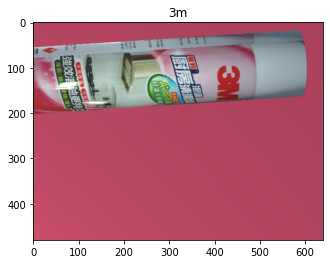

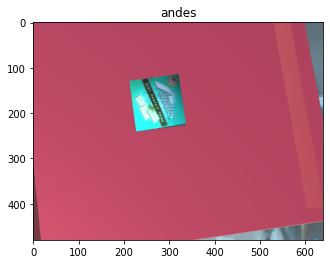

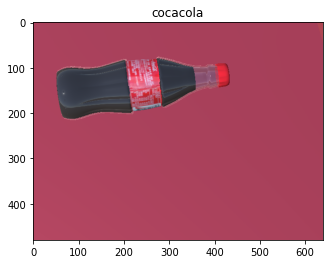

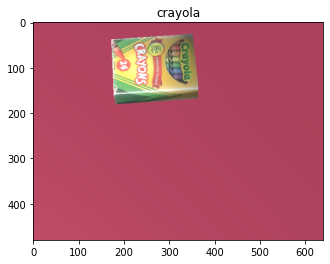

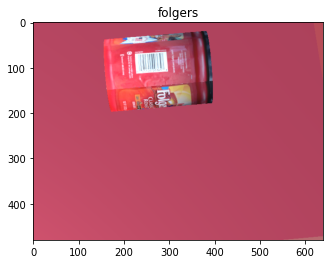

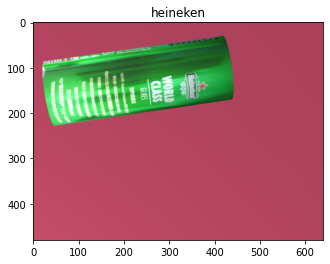

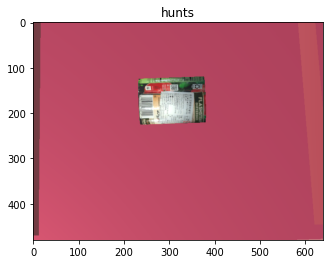

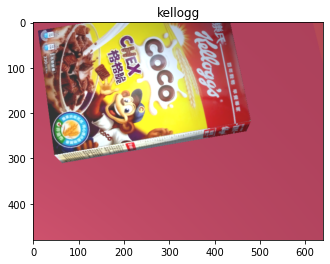

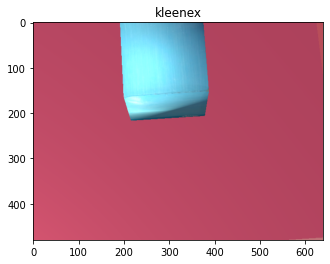

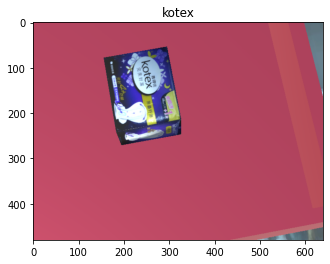

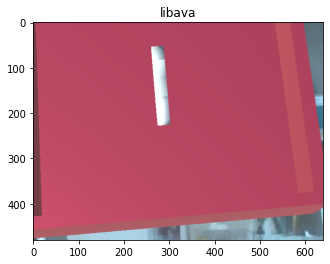

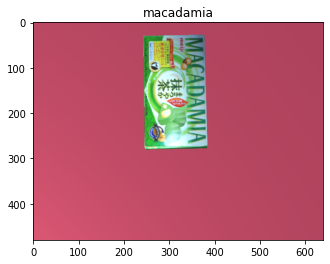

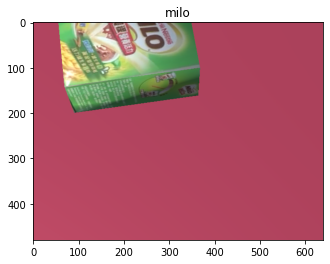

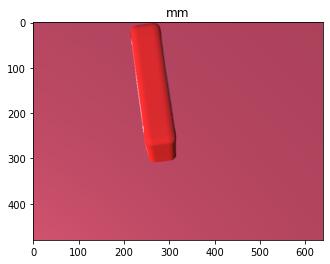

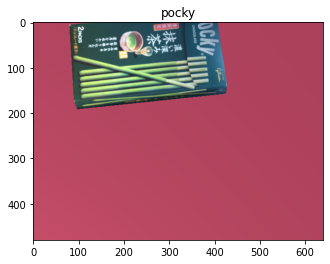

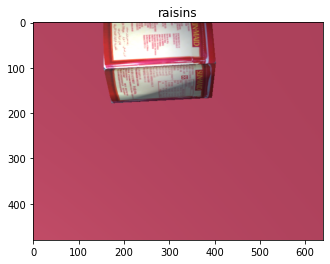

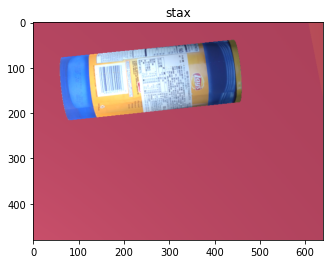

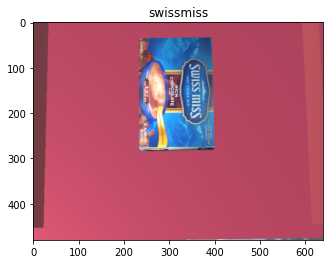

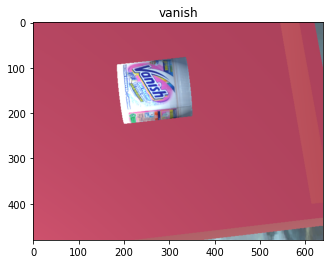

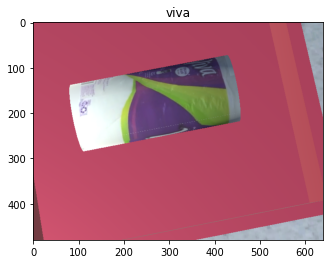

In [25]:
from matplotlib import pyplot as plt
import cv2

dataset_l = ['3m', 'andes', 'cocacola', 'crayola', 'folgers', 'heineken', 'hunts', 'kellogg', 'kleenex', 'kotex', \
             'libava', 'macadamia', 'milo', 'mm', 'pocky', 'raisins', 'stax', 'swissmiss', 'vanish', 'viva']
for dataset in dataset_l:
  path = '/content/dataset/virtual_object/virtual_object/images/' + dataset + '/Scene0/0_original.png'
  img = cv2.imread(path)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.title(dataset)
  plt.imshow(show_img)
  plt.show()

In [28]:
img = cv2.imread('/content/dataset/virtual_object/virtual_object/images/3m/Scene0/0_original.png')
print("Input image size:", img.shape)

Input image size: (480, 640, 3)


## Load pre-trained models

In [20]:
!mkdir -p /content/pretrained_models
%cd /content/pretrained_models
models_l = [['AlphabetSoup.pth'     , 'https://drive.google.com/u/1/uc?id=1rc2785TmekoySxWshjxMm4_gNJe3ohGd&export=download'], \
            ['BBQSauce.pth'         , 'https://drive.google.com/u/1/uc?id=1RLKvxnI6mcgEfRuR1N4_u9oehXFsLjFr&export=download'], \
            ['bleach_28_dr.pth'     , 'https://drive.google.com/u/1/uc?id=1moVZZ0uDsq8hY3VX6oD1IibQmryeTC_5&export=download'], \
            ['Butter.pth'           , 'https://drive.google.com/u/1/uc?id=1lZ4eeRgSTBWdxMgjS6e4QtZbaHKrRnp8&export=download'], \
            ['Cherries.pth'         , 'https://drive.google.com/u/1/uc?id=1XFbpcJQ3EsGnvDBoBr-FqjyGUv0D0O6W&export=download'], \
            ['ChocolatePudding.pth' , 'https://drive.google.com/u/1/uc?id=1EUXKWCbxVJdRnsywcMPv6r0pdWTzd52U&export=download'], \
            ['Cookies.pth'          , 'https://drive.google.com/u/1/uc?id=1pF41ZUw9V-dINUmtyuiEFDV7Quhjlfkn&export=download'], \
            ['Corn.pth'             , 'https://drive.google.com/u/1/uc?id=145HpG9jMiBAvj5XWtzZxhhvP-fFjRIsi&export=download'], \
            ['cracker_60.pth'       , 'https://drive.google.com/u/1/uc?id=1JFXd1au8Y2Z___Mtz0fOf0WtSVLTYE9i&export=download'], \
            ['CreamCheese.pth'      , 'https://drive.google.com/u/1/uc?id=1zqBzGoHRbmt31J_YJnJpN6XjqlrWkDkt&export=download'], \
            ['gelatin_60.pth'       , 'https://drive.google.com/u/1/uc?id=1wdtnqbwjwHsKZ53fcC2P3OU7o3bzLHU0&export=download'], \
            ['GranolaBars.pth'      , 'https://drive.google.com/u/1/uc?id=1AsKig9aXy3C3a0sC8B5ZqjsPLoph_ZOM&export=download'], \
            ['GreenBeans.pth'       , 'https://drive.google.com/u/1/uc?id=1Slr1nrgo83xenCdT9IxV3mw3Jb0mnknG&export=download'], \
            ['Ketchup.pth'          , 'https://drive.google.com/u/1/uc?id=1nbZO5nDDSWinfm7qtC-RfSHpQUTSPTQX&export=download'], \
            ['MacaroniAndCheese.pth', 'https://drive.google.com/u/1/uc?id=16DyQSZrMQBJiy7MldmSU0KLetR2z3Lxq&export=download'], \
            ['Mayo.pth'             , 'https://drive.google.com/u/1/uc?id=1M0MOJI9GW9Kh9ePEW4BKcbFbVZaFSw1p&export=download'], \
            ['meat_20.pth'          , 'https://drive.google.com/u/1/uc?id=1tEwd7clpZN8ZxDI2slRfwR7nSH8uj-l3&export=download'], \
            ['Milk.pth'             , 'https://drive.google.com/u/1/uc?id=1XWb4lDqWHW08tP2yEjSF80Fglvh53SS8&export=download'], \
            ['Mushrooms.pth'        , 'https://drive.google.com/u/1/uc?id=1GbSEv4XPSyMPK5Adqjobbl-tMhI97qR2&export=download'], \
            ['mustard_60.pth'       , 'https://drive.google.com/u/1/uc?id=1xsozvs2ytCNzhHxkfiJRBE1yqgWFvzDC&export=download'], \
            ['Mustard.pth'          , 'https://drive.google.com/u/1/uc?id=13UrrcqklFp2f_H6_ZWiMiOtFnq9WUxe-&export=download'], \
            ['OrangeJuice.pth'      , 'https://drive.google.com/u/1/uc?id=1nE1fHzyK6UfgHDAphQlQnYTMLgbMpTNg&export=download'], \
            ['Parmesan.pth'         , 'https://drive.google.com/u/1/uc?id=1OWqgTRJj6B0lqMdYNI0zla4eKj6jxy6M&export=download'], \
            ['Peaches.pth'          , 'https://drive.google.com/u/1/uc?id=135bGh11MzFqPsDJEk9Hj7whmGXw7VyTF&export=download'], \
            ['PeasAndCarrots.pth'   , 'https://drive.google.com/u/1/uc?id=1tWUeVRhUZ8ssjH8LcR-qiS063qPeDqOk&export=download'], \
            ['Pineapple.pth'        , 'https://drive.google.com/u/1/uc?id=1iObK0jf7o7VGbp4b6Ffgm6zqUPTakSkZ&export=download'], \
            ['Popcorn.pth'          , 'https://drive.google.com/u/1/uc?id=1zWM3DhhZx62EF25xGEeHLUt75CWMv-Ap&export=download'], \
            ['Raisins.pth'          , 'https://drive.google.com/u/1/uc?id=1cOqZmhByVDvVhefbamIHVICmqOq4_-PN&export=download'], \
            ['SaladDressing.pth'    , 'https://drive.google.com/u/1/uc?id=1lorAW3arMZ9HuyT6tY0nQSl21Hk2pEkt&export=download'], \
            ['soup_60.pth'          , 'https://drive.google.com/u/1/uc?id=1Tn4_KLCNoXPzmKSN0e3sfSdMIwTLYLPL&export=download'], \
            ['Spaghetti.pth'        , 'https://drive.google.com/u/1/uc?id=1CsTfh8kpXdR9u06MjAY4HW19_b-diLoP&export=download'], \
            ['sugar_60.pth'         , 'https://drive.google.com/u/1/uc?id=1gD089gWVyqnk_nxb-30zV9XHkpVD50o2&export=download'], \
            ['TomatoSauce.pth'      , 'https://drive.google.com/u/1/uc?id=1ppTt91o0yA99x0mkfZxefcp-FVN0h-Hk&export=download'], \
            ['Tuna.pth'             , 'https://drive.google.com/u/1/uc?id=1yzEXLiZZKnrcHzzF5l9cOGesSs5OcjAU&export=download'], \
            ['Yogurt.pth'           , 'https://drive.google.com/u/1/uc?id=16C8sZHUNt7ZT7Xp4Z9Mm2mjlUY1MWedN&export=download']]

print("Loading {} models:".format(len(models_l)))

for models_name, models_url in models_l:
  if not os.path.isfile("/content/pretrained_models/" + models_name):
    gdown.download(models_url, output="/content/pretrained_models/" + models_name, quiet=False)

print("Finished downloading models.")

/content/pretrained_models
Load 35 models:
AlphabetSoup.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1rc2785TmekoySxWshjxMm4_gNJe3ohGd&export=download
To: /content/pretrained_models/AlphabetSoup.pth
201MB [00:01, 112MB/s]


BBQSauce.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1RLKvxnI6mcgEfRuR1N4_u9oehXFsLjFr&export=download
To: /content/pretrained_models/BBQSauce.pth
201MB [00:02, 83.0MB/s]


bleach_28_dr.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1moVZZ0uDsq8hY3VX6oD1IibQmryeTC_5&export=download
To: /content/pretrained_models/bleach_28_dr.pth
201MB [00:02, 69.6MB/s]


Butter.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1lZ4eeRgSTBWdxMgjS6e4QtZbaHKrRnp8&export=download
To: /content/pretrained_models/Butter.pth
201MB [00:02, 81.5MB/s]


Cherries.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1XFbpcJQ3EsGnvDBoBr-FqjyGUv0D0O6W&export=download
To: /content/pretrained_models/Cherries.pth
201MB [00:02, 67.3MB/s]


ChocolatePudding.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1EUXKWCbxVJdRnsywcMPv6r0pdWTzd52U&export=download
To: /content/pretrained_models/ChocolatePudding.pth
201MB [00:02, 85.5MB/s]


Cookies.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1pF41ZUw9V-dINUmtyuiEFDV7Quhjlfkn&export=download
To: /content/pretrained_models/Cookies.pth
201MB [00:02, 74.9MB/s]


Corn.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=145HpG9jMiBAvj5XWtzZxhhvP-fFjRIsi&export=download
To: /content/pretrained_models/Corn.pth
201MB [00:02, 85.8MB/s]


cracker_60.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1JFXd1au8Y2Z___Mtz0fOf0WtSVLTYE9i&export=download
To: /content/pretrained_models/cracker_60.pth
201MB [00:03, 65.9MB/s]


CreamCheese.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1zqBzGoHRbmt31J_YJnJpN6XjqlrWkDkt&export=download
To: /content/pretrained_models/CreamCheese.pth
201MB [00:02, 73.9MB/s]


gelatin_60.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1wdtnqbwjwHsKZ53fcC2P3OU7o3bzLHU0&export=download
To: /content/pretrained_models/gelatin_60.pth
201MB [00:02, 76.5MB/s]


GranolaBars.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1AsKig9aXy3C3a0sC8B5ZqjsPLoph_ZOM&export=download
To: /content/pretrained_models/GranolaBars.pth
201MB [00:02, 68.1MB/s]


GreenBeans.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1Slr1nrgo83xenCdT9IxV3mw3Jb0mnknG&export=download
To: /content/pretrained_models/GreenBeans.pth
201MB [00:02, 78.0MB/s]


Ketchup.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1nbZO5nDDSWinfm7qtC-RfSHpQUTSPTQX&export=download
To: /content/pretrained_models/Ketchup.pth
201MB [00:07, 28.3MB/s]


MacaroniAndCheese.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=16DyQSZrMQBJiy7MldmSU0KLetR2z3Lxq&export=download
To: /content/pretrained_models/MacaroniAndCheese.pth
201MB [00:01, 145MB/s]


Mayo.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1M0MOJI9GW9Kh9ePEW4BKcbFbVZaFSw1p&export=download
To: /content/pretrained_models/Mayo.pth
201MB [00:03, 58.3MB/s]


meat_20.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1tEwd7clpZN8ZxDI2slRfwR7nSH8uj-l3&export=download
To: /content/pretrained_models/meat_20.pth
201MB [00:03, 64.1MB/s]


Milk.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1XWb4lDqWHW08tP2yEjSF80Fglvh53SS8&export=download
To: /content/pretrained_models/Milk.pth
201MB [00:02, 82.2MB/s]


Mushrooms.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1GbSEv4XPSyMPK5Adqjobbl-tMhI97qR2&export=download
To: /content/pretrained_models/Mushrooms.pth
201MB [00:02, 74.5MB/s]


mustard_60.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1xsozvs2ytCNzhHxkfiJRBE1yqgWFvzDC&export=download
To: /content/pretrained_models/mustard_60.pth
201MB [00:02, 68.0MB/s]


Mustard.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=13UrrcqklFp2f_H6_ZWiMiOtFnq9WUxe-&export=download
To: /content/pretrained_models/Mustard.pth
201MB [00:03, 58.9MB/s]


OrangeJuice.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1nE1fHzyK6UfgHDAphQlQnYTMLgbMpTNg&export=download
To: /content/pretrained_models/OrangeJuice.pth
201MB [00:02, 88.2MB/s]


Parmesan.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1OWqgTRJj6B0lqMdYNI0zla4eKj6jxy6M&export=download
To: /content/pretrained_models/Parmesan.pth
201MB [00:03, 57.4MB/s]


Peaches.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=135bGh11MzFqPsDJEk9Hj7whmGXw7VyTF&export=download
To: /content/pretrained_models/Peaches.pth
201MB [00:02, 68.1MB/s]


PeasAndCarrots.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1tWUeVRhUZ8ssjH8LcR-qiS063qPeDqOk&export=download
To: /content/pretrained_models/PeasAndCarrots.pth
201MB [00:03, 59.0MB/s]


Pineapple.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1iObK0jf7o7VGbp4b6Ffgm6zqUPTakSkZ&export=download
To: /content/pretrained_models/Pineapple.pth
201MB [00:03, 61.0MB/s]


Popcorn.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1zWM3DhhZx62EF25xGEeHLUt75CWMv-Ap&export=download
To: /content/pretrained_models/Popcorn.pth
201MB [00:03, 66.9MB/s]


Raisins.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1cOqZmhByVDvVhefbamIHVICmqOq4_-PN&export=download
To: /content/pretrained_models/Raisins.pth
201MB [00:02, 90.4MB/s]


SaladDressing.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1lorAW3arMZ9HuyT6tY0nQSl21Hk2pEkt&export=download
To: /content/pretrained_models/SaladDressing.pth
201MB [00:02, 75.7MB/s]


soup_60.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1Tn4_KLCNoXPzmKSN0e3sfSdMIwTLYLPL&export=download
To: /content/pretrained_models/soup_60.pth
201MB [00:02, 97.6MB/s]


Spaghetti.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1CsTfh8kpXdR9u06MjAY4HW19_b-diLoP&export=download
To: /content/pretrained_models/Spaghetti.pth
201MB [00:03, 52.5MB/s]


sugar_60.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1gD089gWVyqnk_nxb-30zV9XHkpVD50o2&export=download
To: /content/pretrained_models/sugar_60.pth
201MB [00:02, 91.9MB/s]


TomatoSauce.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1ppTt91o0yA99x0mkfZxefcp-FVN0h-Hk&export=download
To: /content/pretrained_models/TomatoSauce.pth
201MB [00:03, 65.3MB/s]


Tuna.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=1yzEXLiZZKnrcHzzF5l9cOGesSs5OcjAU&export=download
To: /content/pretrained_models/Tuna.pth
201MB [00:02, 69.6MB/s]


Yogurt.pth


Downloading...
From: https://drive.google.com/u/1/uc?id=16C8sZHUNt7ZT7Xp4Z9Mm2mjlUY1MWedN&export=download
To: /content/pretrained_models/Yogurt.pth
201MB [00:03, 61.2MB/s]


Finished downloading models.


In [10]:
%cd /content/catkin_ws
!source /opt/ros/melodic/setup.bash && source devel/setup.bash && roslaunch dope dope.launch 

[Errno 2] No such file or directory: '/root/catkin_ws'
/content/dataset
/bin/bash: devel/setup.bash: No such file or directory
